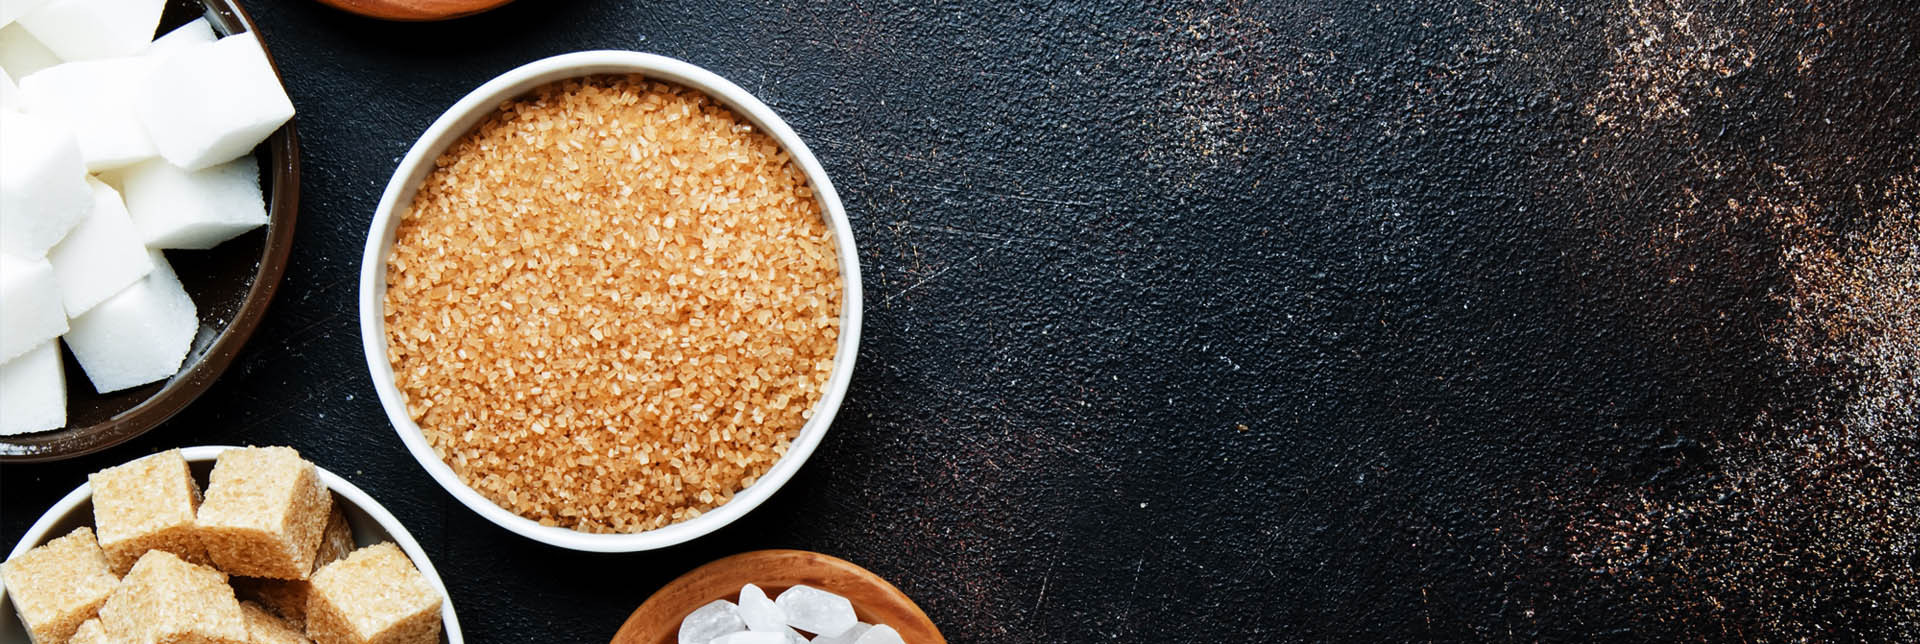

<center>
    
    
 ## Prediction of Dyabetes through Social Variables - A Case Study project
    
___


<center>

##### Pablo de la Asunción Cumbrera Conde


### Índice

 - Project Motivation
 - The Data Set
 - Analysis Plan
 - Exploratory Data Analysis
 - Exploratory Data Analysis Summary
 - Model Developement
 - Conclusions and Recomendations
 - References

#### Project Motivation
____

##### What is diabetes?
Diabetes is the condition in which the body does not properly process food for use as energy. Most of the food we eat is turned into glucose, or sugar, for our bodies to use for energy. The pancreas, an organ that lies near the stomach, makes a hormone called insulin to help glucose get into the cells of our bodies.

##### Diabetes Self-Management Education in Austin Texas

The Community Diabetes Initiative was created to address significant racial and ethnic disparities in the prevalence of type 2 diabetes MOSTLY among African-American and Hispanic Travis County residents by increasing access to culturally appropriate diabetes self-management education through group support-based classes led by certified community health workers. 
>

Classes utilize the Diabetes Empowerment Education Program Curriculum (DEEP), an evidence-based curriculum delivered as a series of six 90-minute classes in either English or Spanish. Weekly lessons in diabetes management include monitoring, medication, exercise and nutrition, preventing complications and managing stress and depression. Lessons provide take-home tools for engagement and retention of learned knowledge. Classes are offered in community-based locations, such as neighborhood centers, schools, faith-based organizations and clinics and are open and free of cost to the public. 
>

In DY4 a total of 347 community members were served, 162 of whom had diabetes. Data from DY4 demonstrate improvement in three important health behaviors: a 44% increase in number of days per week participants engaged in physical activity, a 22% decrease in the number of sugar sweetened beverages consumed per day, and a more than doubling of the number of days per week that food portions were measured. Participants in the program also reported improved diabetes-related quality of life as evidenced by an average 55% decrease of Problem Areas in Diabetes Scale (PAID) scores across the Demonstration Years. 

>

The community health worker model is an effective model for improving diabetes self-management behaviors and diabetes-related quality of life among these two populations.

##### What can we add to the original project?

From one side, I think the virtue and the success of this programm is unescoreable, but from the other side, are the variables the best predictors from a diabetes condition?

Many studies are ethicaly motivated but maybe not so accurate... Lets dive deep in the data to understand and see how much of the phenomena ("Being diabetic") can be explained from the rest of variables, though stadistics and AI.

#### The Data Set
____

##### About the dataset

Dataset containing information about participants in the Austin Public Health's Diabetes Self-Management Education program. This includes demographic information, diabetes status, and other health indicators.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
data_path= r"C:\Users\pablo\Downloads\diabetescsv\Diabetes Self-Management\diabetes_self_management.csv"
dia_data=pd.read_csv(data_path)
print("Shape of the DF: ",dia_data.shape, "\n\n")
print(dia_data.dtypes)

Shape of the DF:  (1688, 21) 


Class                                           object
Class Language                                  object
Age                                            float64
Year                                             int64
Gender                                          object
Insurance Category                              object
Medical Home Category                           object
Race/Ethnicity                                  object
Education Level                                 object
Diabetes Status (Yes/No)                        object
Heart Disease (Yes/No)                          object
High Blood Pressure (Yes/No)                    object
Tobacco Use (Yes/No)                            object
Previous Diabetes Education (Yes/No)            object
Diabetes Knowledge                              object
Fruits & Vegetable Consumption                  object
Sugar-Sweetened Beverage Consumption            object
Food Measurement                 

In [3]:
dia_data.columns= dia_data.columns.str.lower()
dia_data

,class,class language,age,year,gender,insurance category,medical home category,race/ethnicity,education level,diabetes status (yes/no),...,high blood pressure (yes/no),tobacco use (yes/no),previous diabetes education (yes/no),diabetes knowledge,fruits & vegetable consumption,sugar-sweetened beverage consumption,food measurement,carbohydrate counting,exercise,problem area in diabetes (paid) scale score
0,APH,English,47.0,2016,F,Private insurance,Doctor's Office,American Indian,College,Yes,...,No,No,Yes,NaN,3-4,0,0 days,0 days,1 day,13.75
1,PCHW,Spanish,35.0,2015,F,Other,NaN,Hispanic/Latino,NaN,No,...,No,No,No,Fair,1-2,2,I don't know how,I don't know how,1 day,NaN
2,ARCF,English,58.0,2015,F,MediCARE,NaN,Black/African American,1-8,NaN,...,Yes,No,No,Fair,1-2,NaN,NaN,NaN,0 days,NaN
3,PCHW,Spanish,41.0,2015,F,None,No regular place of care,Hispanic/Latino,NaN,No,...,Yes,No,No,NaN,1-2,2,I don't know how,I don't know how,4 days,NaN
4,ARCF,English,56.0,2015,M,None,Emergency Room,NaN,College,No,...,No,No,No,NaN,1-2,1,0 days,0 days,0 days,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,EB,Spanish,43.0,2017,F,None,NaN,Hispanic/Latino,9-11,No,...,No,No,Yes,Fair,1-2,1,0 days,0 days,5 or more days,NaN
1684,ARCF,English,41.0,2017,M,Other,People's Community Clinic,Asian,Some College,Yes,...,No,No,Yes,Fair,3-4,1,0 days,0 days,2 days,48.75
1685,ARCF,English,49.0,2016,F,Private insurance,Doctor's Office,Hispanic/Latino,Some College,No,...,Yes,NaN,No,Poor,NaN,0,0 days,0 days,0 days,NaN
1686,EB,Spanish,27.0,2015,F,Other,Lone Star Circle of Care,Hispanic/Latino,High School GED,Yes,...,No,No,No,Fair,3-4,1,1-3,1-3,3 days,31.25


#### Data Cleansing 
___

##### Duplicated values

In [4]:
### Any duplicated data?
dia_data.duplicated().sum()  

14

In [5]:
dia_data.loc[dia_data.duplicated() == True]

,class,class language,age,year,gender,insurance category,medical home category,race/ethnicity,education level,diabetes status (yes/no),...,high blood pressure (yes/no),tobacco use (yes/no),previous diabetes education (yes/no),diabetes knowledge,fruits & vegetable consumption,sugar-sweetened beverage consumption,food measurement,carbohydrate counting,exercise,problem area in diabetes (paid) scale score
432,APH,English,56.0,2015,F,MAP,CommUnityCare,White,1-8,Yes,...,Yes,Yes,Yes,Good,5 or more,0,0,4 or more,4 days,16.25
577,APH,Chinese/English,NaN,2017,NaN,NaN,NaN,Asian,NaN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
733,APH,English,39.0,2015,F,Private insurance,Doctor's Office,Hispanic/Latino,Some College,Yes,...,No,No,No,Poor,1-2,1,1-3,0 days,2 days,83.75
941,APH,English,57.0,2015,M,MediCARE,Other,Hispanic/Latino,High School GED,Yes,...,Yes,No,Yes,Good,3-4,0,4 or more,1-3,2 days,25.00
955,APH,Chinese/English,NaN,2017,NaN,NaN,NaN,Asian,NaN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1091,ARCF,English,60.0,2017,F,MediCARE,CommUnityCare,White,College,Yes,...,Yes,No,Yes,Good,1-2,0,0,4 or more,0 days,52.50
1150,APH,English,60.0,2015,M,Medicaid,CommUnityCare,Black/African American,High School GED,Yes,...,Yes,Yes,Yes,Good,1-2,0,4 or more,0 days,4 days,NaN
1387,APH,Spanish,37.0,2017,F,None,CommUnityCare,Hispanic/Latino,1-8,No,...,No,No,No,Fair,1-2,2,0 days,0 days,0 days,NaN
1403,APH,English,60.0,2015,F,Medicaid,Doctor's Office,Hispanic/Latino,High School GED,Yes,...,No,No,No,Poor,3-4,1,I don't know how,I don't know how,5 or more days,47.50
1492,APH,English,60.0,2015,F,Medicaid,Doctor's Office,White,High School GED,Yes,...,No,No,No,Fair,3-4,0,4 or more,4 or more,3 days,36.25


Not so duplicated after all! So its been left as is it

##### Selecting the target Value

In [6]:
dia_data['diabetes status (yes/no)'].value_counts()

No         932
Yes        712
Unknown     14
Name: diabetes status (yes/no), dtype: int64

In [7]:
#SUSTITUR UNKNOWN POR NAN
dia_data['diabetes status (yes/no)']=dia_data['diabetes status (yes/no)'].replace({'Unknown': None})

In [8]:
dia_data['diabetes status (yes/no)'].value_counts()

No     932
Yes    712
Name: diabetes status (yes/no), dtype: int64

##### NaN Values Exploration

In [9]:
print("Number of Null values (per column):\n\n",dia_data.isnull().sum())

Number of Null values (per column):

 class                                             0
class language                                    0
age                                              32
year                                              0
gender                                           37
insurance category                              113
medical home category                            91
race/ethnicity                                   37
education level                                 289
diabetes status (yes/no)                         44
heart disease (yes/no)                          100
high blood pressure (yes/no)                     93
tobacco use (yes/no)                            124
previous diabetes education (yes/no)            125
diabetes knowledge                              154
fruits & vegetable consumption                   52
sugar-sweetened beverage consumption             53
food measurement                                 63
carbohydrate counting     

##### Missing values dealing - Data imputation 

In [10]:
####Create an empty dictionary ordinal_enc_dict

ordinal_enc_dict = {}

#Defining imputer Function

def df_encoding(df):
    
    for col_name in df:
        # Create Ordinal encoder for col
        ordinal_enc_dict[col_name] = OrdinalEncoder()
        col = df[col_name]
    
        # Select non-null values of col
        col_not_null = col[col.notnull()]
        reshaped_vals = col_not_null.values.reshape(-1, 1)
        encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
        # Store the values to non-null values of the column in df
        df.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)
    
def df_imputer(df):
    
    # Create KNN imputer
    KNN_imputer = KNN()

    # Impute and round the DataFrame
    df.iloc[:, :] = np.round(KNN_imputer.fit_transform(df))
    
def df_reverse(df):
    
    for col_name in df:
    
        # Reshape the data
        reshaped = df[col_name].values.reshape(-1, 1)
    
        # Perform inverse transform of the ordinally encoded columns
        df[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped)
    
    
#Introduce data to impute

imp_diabetes = dia_data.select_dtypes(include=['object','float64']).copy()
df_encoding(imp_diabetes)
df_imputer(imp_diabetes)

#Copy 
diabetes = imp_diabetes.copy()

#Finally reverse
df_reverse(diabetes)

Imputing row 1/1688 with 1 missing, elapsed time: 0.530
Imputing row 101/1688 with 1 missing, elapsed time: 0.530
Imputing row 201/1688 with 0 missing, elapsed time: 0.538
Imputing row 301/1688 with 0 missing, elapsed time: 0.538
Imputing row 401/1688 with 1 missing, elapsed time: 0.546
Imputing row 501/1688 with 1 missing, elapsed time: 0.546
Imputing row 601/1688 with 1 missing, elapsed time: 0.554
Imputing row 701/1688 with 1 missing, elapsed time: 0.554
Imputing row 801/1688 with 1 missing, elapsed time: 0.562
Imputing row 901/1688 with 1 missing, elapsed time: 0.562
Imputing row 1001/1688 with 1 missing, elapsed time: 0.562
Imputing row 1101/1688 with 3 missing, elapsed time: 0.570
Imputing row 1201/1688 with 1 missing, elapsed time: 0.570
Imputing row 1301/1688 with 1 missing, elapsed time: 0.579
Imputing row 1401/1688 with 0 missing, elapsed time: 0.579
Imputing row 1501/1688 with 4 missing, elapsed time: 0.588
Imputing row 1601/1688 with 1 missing, elapsed time: 0.588


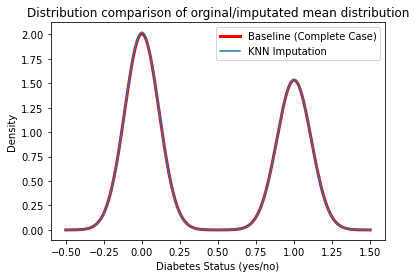

In [11]:
# Creation of a NON KNN-IMPUTED COPY of the Data Frame

dia_data_no_nan = dia_data.select_dtypes(include=['object','float64']).copy()
df_encoding(dia_data_no_nan)


# Plot graphs to check visually that distribution fits
dia_data_no_nan['diabetes status (yes/no)'].plot(kind='kde', c='red', linewidth=3)
imp_diabetes['diabetes status (yes/no)'].plot(kind='kde')


# Create labels for the four DataFrames
labels = ['Baseline (Complete Case)', 'KNN Imputation']
plt.legend(labels)

# Set the x-label as Skin Fold
plt.xlabel('Diabetes Status (yes/no)')
plt.title("Distribution comparison of orginal/imputated mean distribution")
plt.show()

In [12]:
#Finally we include the column we excluded 
diabetes['year']=dia_data['year']
imp_diabetes['year']=dia_data['year']

#Check NaN
diabetes.isnull().sum()

class                                          0
class language                                 0
age                                            0
gender                                         0
insurance category                             0
medical home category                          0
race/ethnicity                                 0
education level                                0
diabetes status (yes/no)                       0
heart disease (yes/no)                         0
high blood pressure (yes/no)                   0
tobacco use (yes/no)                           0
previous diabetes education (yes/no)           0
diabetes knowledge                             0
fruits & vegetable consumption                 0
sugar-sweetened beverage consumption           0
food measurement                               0
carbohydrate counting                          0
exercise                                       0
problem area in diabetes (paid) scale score    0
year                

##### Data Exploration

In [13]:
#Function to explore the data
def explorecol (df):
    for col in df:
        print(col,"\n\n",df[col].value_counts(),"\n\n")
        
explorecol(diabetes)

class 

 APH     799
ARCF    428
EB      302
PCHW    159
Name: class, dtype: int64 


class language 

 Spanish            1011
English             642
Chinese/English      35
Name: class language, dtype: int64 


age 

 52.0    47
58.0    46
42.0    46
37.0    45
36.0    44
        ..
16.0     2
87.0     2
93.0     1
88.0     1
91.0     1
Name: age, Length: 75, dtype: int64 


gender 

 F    1368
M     319
f       1
Name: gender, dtype: int64 


insurance category 

 None                 523
Other                304
Private insurance    270
MediCARE             200
Medicaid             197
MAP                  194
Name: insurance category, dtype: int64 


medical home category 

 CommUnityCare                442
Doctor's Office              433
Other                        165
People's Community Clinic    164
No regular place of care     151
El Buen Samaritano           145
Lone Star Circle of Care      72
Seton Clinics                 63
Emergency Room                53
Name: medical

In [14]:
## Fixing some data

def data_cleaner (col_name, value, new_value):
    diabetes.loc[diabetes[col_name] == value, col_name] = new_value

data_cleaner('gender','f','F')
data_cleaner('race/ethnicity','Unknown', 'Other')
data_cleaner('education level', 'y','none')
data_cleaner('education level','n', 'none')
data_cleaner('education level', 'Some College','College')
data_cleaner('carbohydrate counting',"I don't know how",'Ns/Nc')
data_cleaner('diabetes status (yes/no)','Unknown', 'Ns/Nc')
data_cleaner('fruits & vegetable consumption', 'Unknown', 'Ns/Nc')
data_cleaner('fruits & vegetable consumption','Not Sure','Ns/Nc')
data_cleaner('sugar-sweetened beverage consumption','Not Sure', 'Ns/Nc')
data_cleaner('food measurement','Not Sure','Ns/Nc')
data_cleaner('food measurement',"I don't know how",'Ns/Nc')
data_cleaner('carbohydrate counting', "Not Sure",'Ns/Nc')
data_cleaner('exercise',"Not Sure",'Ns/Nc')
data_cleaner('food measurement', "0 days",'0')

explorecol(diabetes)

class 

 APH     799
ARCF    428
EB      302
PCHW    159
Name: class, dtype: int64 


class language 

 Spanish            1011
English             642
Chinese/English      35
Name: class language, dtype: int64 


age 

 52.0    47
58.0    46
42.0    46
37.0    45
36.0    44
        ..
16.0     2
87.0     2
93.0     1
88.0     1
91.0     1
Name: age, Length: 75, dtype: int64 


gender 

 F    1369
M     319
Name: gender, dtype: int64 


insurance category 

 None                 523
Other                304
Private insurance    270
MediCARE             200
Medicaid             197
MAP                  194
Name: insurance category, dtype: int64 


medical home category 

 CommUnityCare                442
Doctor's Office              433
Other                        165
People's Community Clinic    164
No regular place of care     151
El Buen Samaritano           145
Lone Star Circle of Care      72
Seton Clinics                 63
Emergency Room                53
Name: medical home cate

##### Train Test Split

In [15]:
## Split Test Set in order to Avoid Snooping Bias

train_set, test_set = train_test_split (diabetes, test_size=0.15, random_state=40)

print("train set shape: ",train_set.shape)
print("test set shape: ",test_set.shape)


###TRAIN SET

diabetes_train = train_set.copy()

#### TEST SET

diabetes_test = test_set.copy()

train set shape:  (1434, 21)
test set shape:  (254, 21)


#### Analysis Plan
____

##### ¿What os an Analysis Plan?
An analysis plan helps you think through the data you will collect, what you will use it for, and how you will analyze it. Creating an analysis plan is an important way to ensure that you collect all the data you need and that you use all the data you collect. Analysis planning can be an invaluable investment of time.

##### On this project...

1. Clean and Understand Data
2. Plot variables 
3. Compare Correlation Coefficients
4. Develope a Machine Learning Model
5. Discuss insights

#### Exploratory Data Analysis (EDA)
____

##### ¿What is EDA?
>

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate.
>
##### ¿What is the main purpose of EDA?
>
To help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.

##### In this case:

>
- Plotting the data grouped by a personal selection.
>
- Searching for correlations between different columns and plotting correlation matrix.

##### Understanding the data

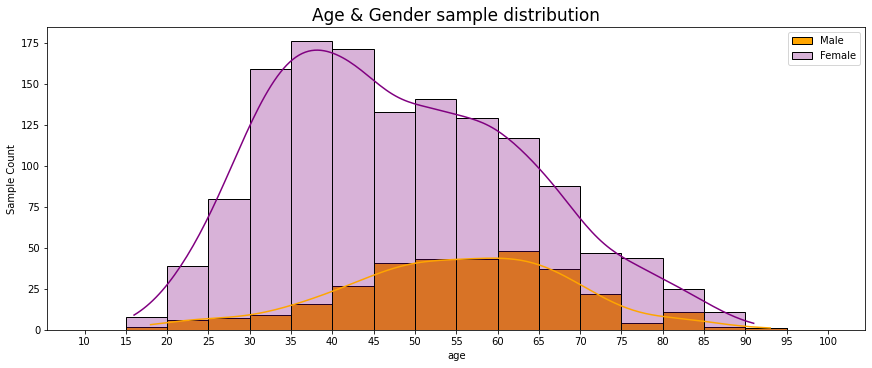

In [16]:
figg = plt.figure(figsize=(12,5),constrained_layout=True)
ax = figg.subplots()
bins=(10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100)

plt.title("Age & Gender sample distribution",fontsize=17)


sns.histplot(
    diabetes[diabetes.gender == "M"].age,
    color="orange",
    label="Male",
    kde=True,
    alpha=1,
    bins=bins
    )
sns.histplot(
    diabetes[diabetes.gender == "F"].age,
    color="purple",
    label="Female",
    alpha=0.3,
    kde=True,
    bins=bins
    )
ax.set(ylabel="Sample Count",xticks=bins)
plt.legend()

plt.show()

We clearly see that the 'Gender' variable is clearly inbalanced, so this may conduct to serious biases in our study. We will keep this in mind so we manage to avoid any bias.

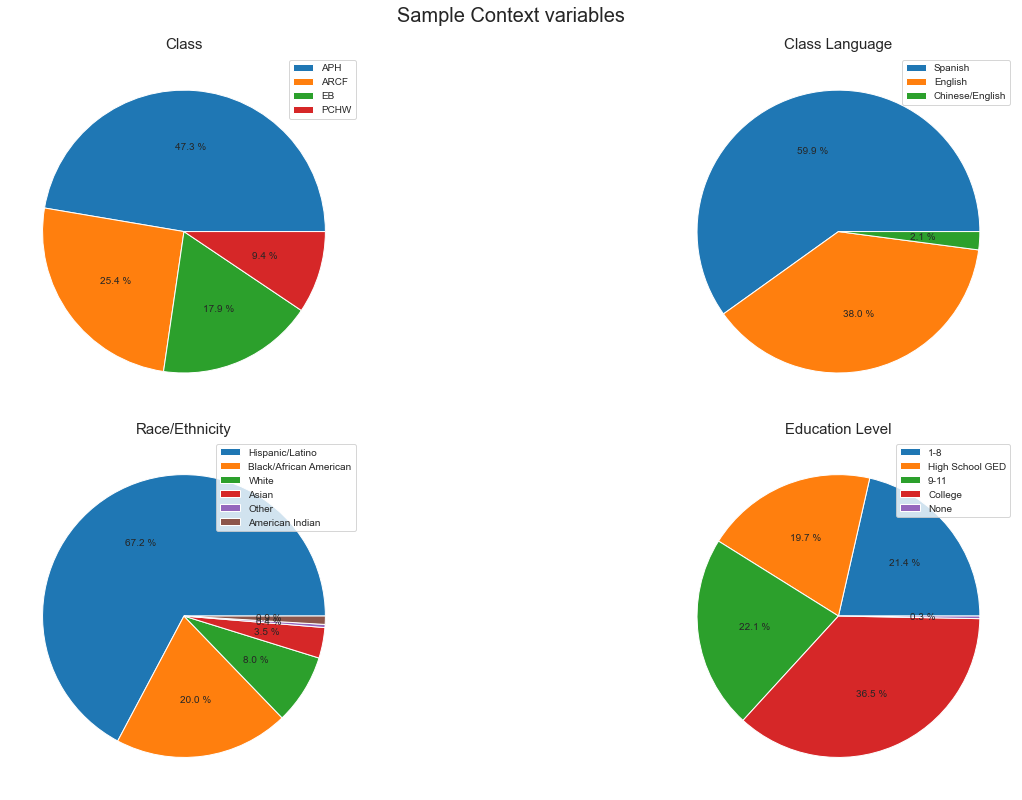

In [17]:
#Select Style

sns.set_style("whitegrid")

#Select Variable

a=diabetes['class'].value_counts()
b=diabetes['class language'].value_counts()
c=diabetes['race/ethnicity'].value_counts().loc[['Hispanic/Latino','Black/African American','White','Asian','American Indian','Other']]
d=diabetes['education level'].value_counts().loc[['1-8','High School GED','9-11','College','none']]

# Create a Figure and an array of subplots with 2 rows and 2 columns
figg = plt.figure(figsize=(18,11),constrained_layout=True)
ax = figg.subplots(2,2)

figg.suptitle('Sample Context variables',fontsize=20)

def PlotPie (ax, data, title,legend):
    ax.pie(data ,autopct="%0.1f %%")
    ax.set_title(title,fontsize=15)
    ax.legend(legend,loc="best")

PlotPie (ax[0,0], a,"Class",['APH', 'ARCF', 'EB', 'PCHW'])
PlotPie (ax[0,1], b,"Class Language", ['Spanish', 'English', 'Chinese/English'])
PlotPie (ax[1,0], c, "Race/Ethnicity", ['Hispanic/Latino','Black/African American','White','Asian','Other','American Indian'])
PlotPie (ax[1,1], d, "Education Level", ['1-8','High School GED','9-11','College','None'])


plt.show()

As its been told on introduction, most of the sample are Hispanic/Latino, Black/African Americans, so mostly Spanish is spoken, and finally, as its about a sample

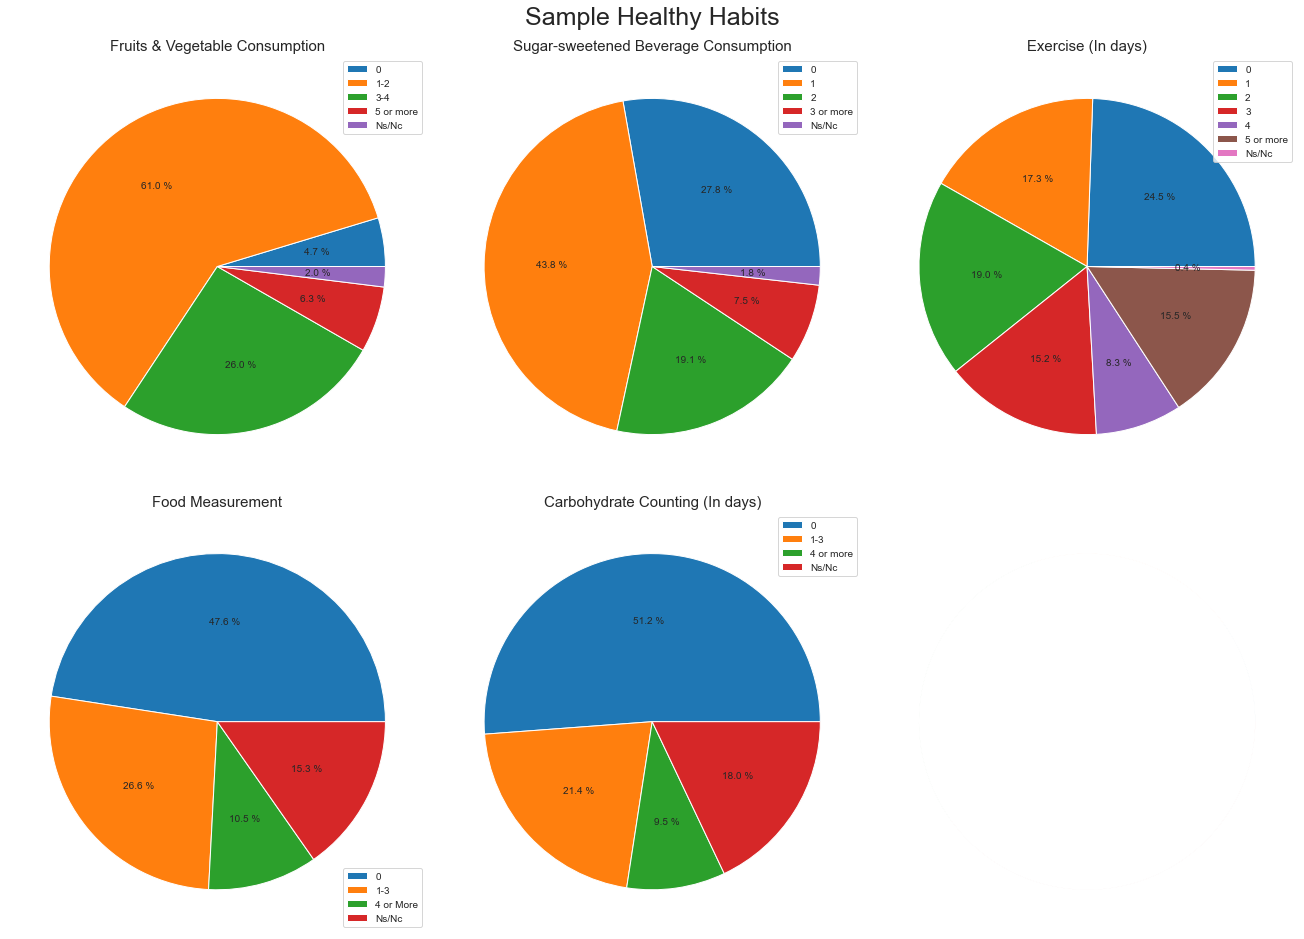

In [18]:
#Select Variables

a=diabetes['fruits & vegetable consumption'].value_counts().loc[['0','1-2','3-4','5 or more', 'Ns/Nc']]
b=diabetes['sugar-sweetened beverage consumption'].value_counts().loc[['0','1','2','3 or more',"Ns/Nc"]]
c=diabetes['food measurement'].value_counts().loc[['0','1-3','4 or more','Ns/Nc']]
d=diabetes['carbohydrate counting'].value_counts().loc[['0 days','1-3','4 or more','Ns/Nc']]
e=diabetes['exercise'].value_counts().loc[['0 days','1 day','2 days','3 days','4 days','5 or more days','Ns/Nc']]



# Create a Figure and an array of subplots with 2 rows and 2 columns
figg = plt.figure(figsize=(18,13),constrained_layout=True)
ax = figg.subplots(2,3)

figg.suptitle('Sample Healthy Habits',fontsize=25)


ax[0, 0].pie(a,autopct="%0.1f %%")
ax[0,0].set_title("Fruits & Vegetable Consumption",fontsize=15)
ax[0,0].legend(['0','1-2','3-4','5 or more', 'Ns/Nc'],loc="best")

ax[0, 1].pie(b,autopct="%0.1f %%")
ax[0,1].set_title ("Sugar-sweetened Beverage Consumption",fontsize=15)
ax[0,1].legend(['0','1','2','3 or more',"Ns/Nc"],loc="best")


ax[1,0].pie(c,autopct="%0.1f %%")
ax[1,0].set_title ("Food Measurement",fontsize=15)
ax[1,0].legend(['0','1-3','4 or More','Ns/Nc'],loc="best")


ax[1, 1].pie(d,autopct="%0.1f %%")
ax[1,1].set_title ("Carbohydrate Counting (In days)",fontsize=15)
ax[1,1].legend(['0','1-3','4 or more','Ns/Nc'],loc="best")
                   
ax[0, 2].pie(e,autopct="%0.1f %%")
ax[0,2].set_title ("Exercise (In days)",fontsize=15)
ax[0,2].legend(['0','1','2','3','4','5 or more','Ns/Nc'],loc="best")

ax[1, 2].pie([1,2,3,4])
mycircle=plt.Circle((0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(mycircle)


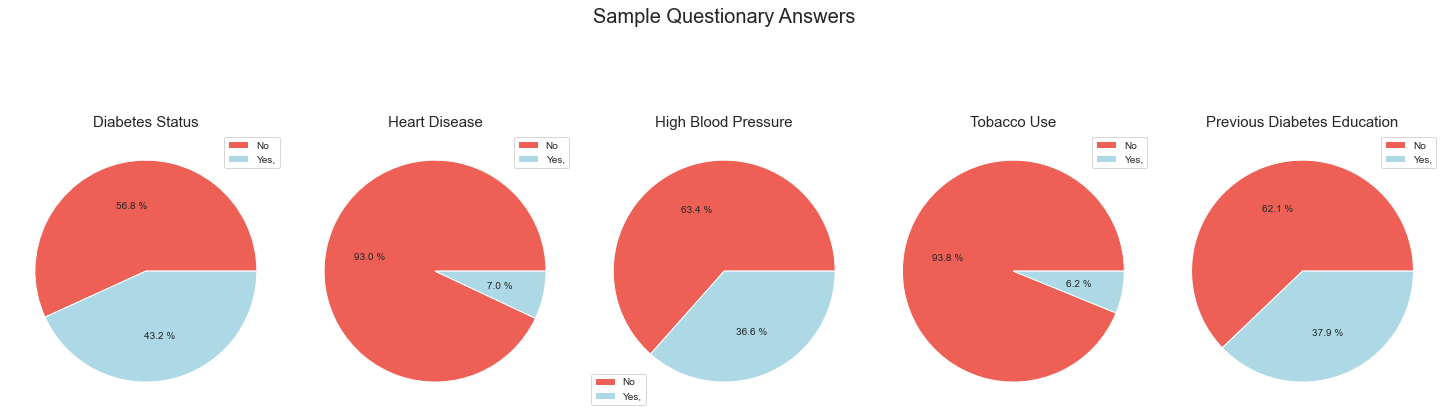

In [19]:
#Data

a=diabetes['diabetes status (yes/no)'].value_counts()
b=diabetes['heart disease (yes/no)'].value_counts()
c=diabetes['high blood pressure (yes/no)'].value_counts()
d=diabetes['tobacco use (yes/no)'].value_counts()
e=diabetes['previous diabetes education (yes/no)'].value_counts()




# Create a Figure and an array of subplots with 2 rows and 2 columns
figg = plt.figure(figsize=(20,7),constrained_layout=True)
ax = figg.subplots(1,5)

figg.suptitle('Sample Questionary Answers',fontsize=20)

colors=["#EE6055","lightblue","lightgreen"]
ax[0].pie(a,autopct="%0.1f %%",colors= colors)
ax[0].set_title("Diabetes Status",fontsize=15)
ax[0].legend(['No', 'Yes,','Ns/Nc'],loc="best")

ax[1].pie(b,autopct="%0.1f %%",colors=colors)
ax[1].set_title ("Heart Disease",fontsize=15)
ax[1].legend(['No', 'Yes,','Ns/Nc'],loc="best")


ax[2].pie(c,autopct="%0.1f %%", colors=colors)
ax[2].set_title ("High Blood Pressure",fontsize=15)
ax[2].legend(['No', 'Yes,','Ns/Nc'],loc="best")


ax[3].pie(d,autopct="%0.1f %%", colors=colors)
ax[3].set_title ("Tobacco Use",fontsize=15)
ax[3].legend(['No', 'Yes,','Ns/Nc'],loc="best")

ax[4].pie(e,autopct="%0.1f %%", colors= colors)
ax[4].set_title ("Previous Diabetes Education",fontsize=15)
ax[4].legend(['No', 'Yes,','Ns/Nc'],loc="best")

plt.show()

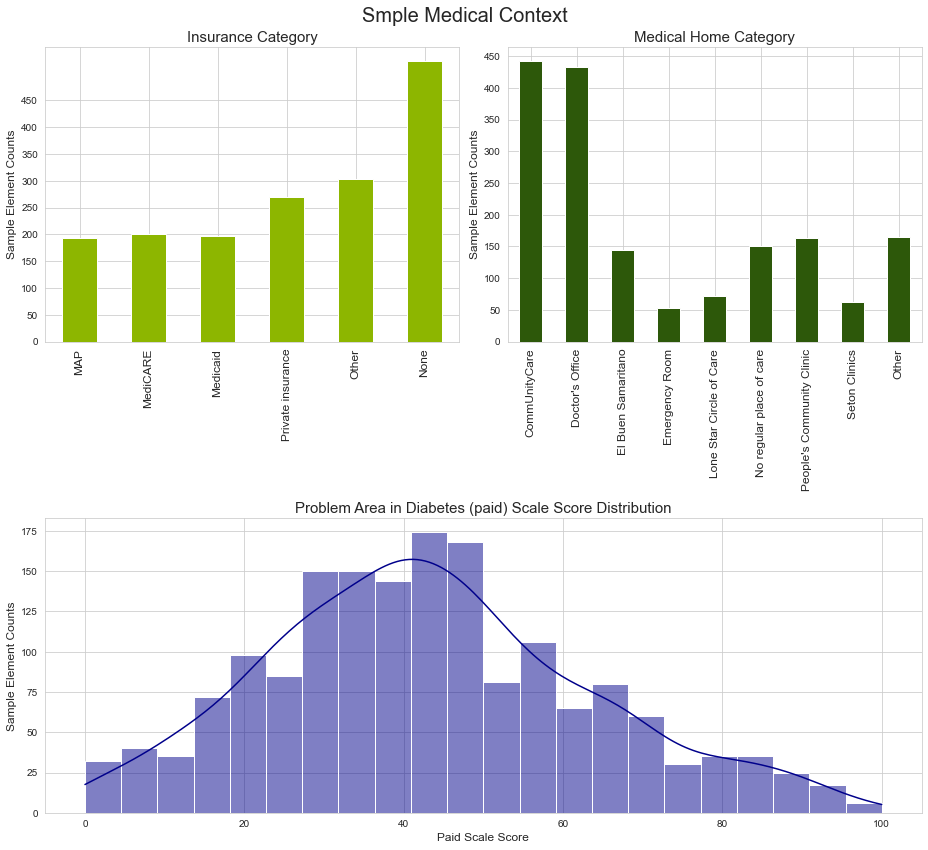

In [20]:
plt.suptitle("Smple Medical Context",fontsize=20)


plt.subplot(2, 1, 2)
ax = figg.subplots()
sns.histplot(diabetes['problem area in diabetes (paid) scale score'], kde=True, color= 'darkblue')
plt.title("Problem Area in Diabetes (paid) Scale Score Distribution",fontsize=15)
plt.xlabel("Paid Scale Score", fontsize=12)
plt.ylabel("Sample Element Counts", fontsize=12)


bins= [0,50,100,150,200,250,300,350,400,450]
plt.subplot(2, 2, 2)
diabetes['medical home category'].value_counts().loc[['CommUnityCare', "Doctor's Office", 'El Buen Samaritano',
        'Emergency Room', 'Lone Star Circle of Care',
        'No regular place of care',
        "People's Community Clinic", 'Seton Clinics','Other']].plot.bar(figsize=(15,10),color='#2d580a')
plt.title("Medical Home Category",fontsize=15)
plt.ylabel("Sample Element Counts", fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(bins)


plt.subplot(2, 2, 1)

diabetes['insurance category'].value_counts().loc[['MAP', 'MediCARE', 'Medicaid','Private insurance','Other','None']].plot.bar(figsize=(13,12), color='#8DB600')
plt.title("Insurance Category",fontsize=15)
plt.ylabel("Sample Element Counts", fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(bins)

plt.tight_layout()

##### Searching for Correlations

In [21]:
corr_matrix = imp_diabetes.corr()
print(corr_matrix["diabetes status (yes/no)"].sort_values(ascending=False))

diabetes status (yes/no)                       1.000000
age                                            0.316967
high blood pressure (yes/no)                   0.286930
previous diabetes education (yes/no)           0.202280
gender                                         0.195423
heart disease (yes/no)                         0.103372
tobacco use (yes/no)                           0.070060
medical home category                          0.069168
problem area in diabetes (paid) scale score    0.039608
education level                                0.026994
race/ethnicity                                 0.025725
carbohydrate counting                          0.007162
year                                           0.004733
class                                          0.002733
fruits & vegetable consumption                -0.021484
food measurement                              -0.024663
exercise                                      -0.049297
diabetes knowledge                            -0

In [22]:
corr_matrix.style.background_gradient(cmap='RdBu_r', axis=None, vmin=-1, vmax=1).set_precision(3)

,class,class language,age,gender,insurance category,medical home category,race/ethnicity,education level,diabetes status (yes/no),heart disease (yes/no),high blood pressure (yes/no),tobacco use (yes/no),previous diabetes education (yes/no),diabetes knowledge,fruits & vegetable consumption,sugar-sweetened beverage consumption,food measurement,carbohydrate counting,exercise,problem area in diabetes (paid) scale score,year
class,1.000,0.229,-0.020,0.013,0.085,-0.069,-0.047,-0.054,0.003,-0.054,-0.029,-0.063,-0.064,0.036,-0.037,0.020,0.049,0.107,-0.022,0.186,-0.437
class language,0.229,1.000,-0.435,-0.176,0.033,0.062,0.151,-0.446,-0.142,-0.110,-0.303,-0.134,-0.157,0.080,-0.079,0.052,0.117,0.116,-0.088,0.356,0.005
age,-0.020,-0.435,1.000,0.172,-0.086,0.002,-0.061,0.146,0.317,0.201,0.460,0.039,0.200,-0.019,0.040,-0.133,-0.060,-0.021,0.097,-0.207,0.051
gender,0.013,-0.176,0.172,1.000,-0.028,0.105,0.024,0.053,0.195,0.068,0.090,0.133,-0.036,0.032,-0.022,0.020,0.021,-0.011,0.025,-0.060,0.001
insurance category,0.085,0.033,-0.086,-0.028,1.000,0.054,-0.050,0.080,-0.057,-0.080,-0.073,-0.063,-0.048,0.035,0.002,-0.047,0.012,-0.046,-0.025,0.049,-0.092
medical home category,-0.069,0.062,0.002,0.105,0.054,1.000,0.006,-0.073,0.069,-0.018,-0.003,0.004,-0.064,0.037,-0.005,0.038,0.050,0.039,-0.027,-0.070,0.108
race/ethnicity,-0.047,0.151,-0.061,0.024,-0.050,0.006,1.000,-0.017,0.026,0.001,-0.055,0.035,-0.068,0.029,-0.003,-0.077,-0.031,-0.011,-0.055,0.050,-0.013
education level,-0.054,-0.446,0.146,0.053,0.080,-0.073,-0.017,1.000,0.027,0.073,0.128,0.067,0.134,-0.084,0.011,-0.079,-0.107,-0.173,0.056,-0.300,-0.033
diabetes status (yes/no),0.003,-0.142,0.317,0.195,-0.057,0.069,0.026,0.027,1.000,0.103,0.287,0.070,0.202,-0.051,-0.021,-0.083,-0.025,0.007,-0.049,0.040,0.005
heart disease (yes/no),-0.054,-0.110,0.201,0.068,-0.080,-0.018,0.001,0.073,0.103,1.000,0.274,0.017,0.107,-0.025,0.052,-0.036,0.011,-0.006,0.028,-0.084,0.022


#### Exploratory Data Analysis Summary
____

- Gender & ethniticy variables are unbalanced. Hispanic (67%) from 6 more races/ethnicities, making it risky (bias) drawing conclussions extrapolated to a general population.
- 5 (yes/no) variables.
- Diabetes Correlated variables are far from economic or ethnicity ex

#### Model Developement
____

In [23]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

##### What is our model about?

Next step is developing a model to predict if a person is diabetic/non diabetic based on data parameters.

In [24]:
#ENCODING TRAIN TEST
enc_train = diabetes_train.copy()
df_encoding(enc_train)

#ENCODING TEST SET
enc_test = diabetes_test.copy()
df_encoding(enc_test)

##### Dimensionality Reduction

In [25]:
#Since we are creating a Model that predicts if a person could be diabetic/Non-diabetic, we drop valus that does not correlate with our target variable.

#Training sets
#diabetes.drop(['carbohydrate counting','year','class'], axis=1, inplace=True)
#enc_train.drop(['carbohydrate counting','year','class'], axis=1, inplace=True)

#Test sets
#diabetes_test.drop(['carbohydrate counting','year','class'], axis=1, inplace=True)
#enc_test.drop(['carbohydrate counting','year','class'], axis=1, inplace=True)

#target.loc[target[1.0] == True]

In [26]:
#########DECLARING TARGET VARIABLES

#SPLIT ENCODED TRAINING SET

target = enc_train['diabetes status (yes/no)']
X = enc_train.drop(['diabetes status (yes/no)'], axis=1)

#SPLIT ENCODED TEST SET
enc_target_test = enc_test['diabetes status (yes/no)']
enc_X_test = enc_test.drop(['diabetes status (yes/no)'], axis=1)

##### Feature Scaling

¿Do the data need to be Standardize? Lets check for ".sum()" differences

In [27]:
X.sum()

class                                           1305.0
class language                                  2267.0
age                                            46364.0
gender                                           262.0
insurance category                              3997.0
medical home category                           3900.0
race/ethnicity                                  4145.0
education level                                 2220.0
heart disease (yes/no)                            94.0
high blood pressure (yes/no)                     526.0
tobacco use (yes/no)                              89.0
previous diabetes education (yes/no)             538.0
diabetes knowledge                              1073.0
fruits & vegetable consumption                  2009.0
sugar-sweetened beverage consumption            1622.0
food measurement                                1367.0
carbohydrate counting                           1381.0
exercise                                        3046.0
problem ar

¡Indeed it does!

In [28]:
## Initialize a Standard Scaler

#scaler = StandardScaler()
#scaler.fit(X)
#X = scaler.transform(X)

#scaler = StandardScaler()
#scaler.fit(enc_X_test)
#enc_X_test = scaler.transform(enc_X_test)

##### Regression Model

In [29]:
# Regression Model with statsmodels
Constant = sm.add_constant(X) # adding a constant
 
model = sm.OLS(target, Constant).fit()
print_model = model.summary()
print(print_model)

                               OLS Regression Results                               
Dep. Variable:     diabetes status (yes/no)   R-squared:                       0.199
Model:                                  OLS   Adj. R-squared:                  0.188
Method:                       Least Squares   F-statistic:                     17.58
Date:                      Wed, 04 Aug 2021   Prob (F-statistic):           4.58e-55
Time:                              18:32:25   Log-Likelihood:                -868.25
No. Observations:                      1434   AIC:                             1779.
Df Residuals:                          1413   BIC:                             1889.
Df Model:                                20                                         
Covariance Type:                  nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Regression Model: It does not is useful as a predictor as best predictor param is the constant itself, and R squared only 0.20 (Only 20% of the phenomena its explanable through this Regression Model)

Accuraccy is only 67% (Being 50% given by chance - yes/no ).

##### KNN Model

In [30]:
#First we try to find the best value for K

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X,target)
    
    train_scores.append(knn.score(X,target))
    test_scores.append(knn.score(enc_X_test,enc_target_test))

In [31]:
## Score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [32]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 74.40944881889764 % and k = [8]


C:\Users\pablo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pablo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Number of K')

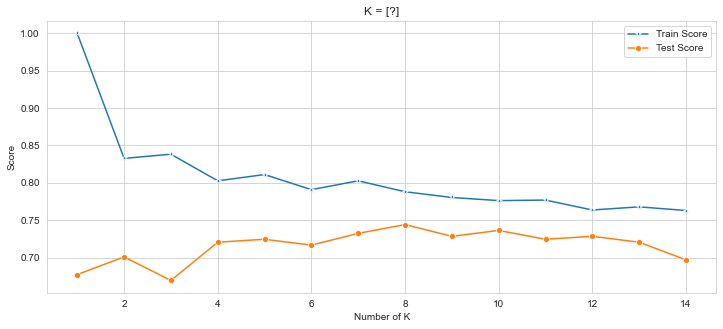

In [33]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')
plt.title ( "K = [?]")
plt.ylabel("Score")
plt.xlabel("Number of K")

In [34]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(12)

knn.fit(X,target)
knn.score(enc_X_test, enc_target_test)

0.7283464566929134

##### KNN Confusion Matrix

In [35]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(enc_X_test)
confusion_matrix(enc_target_test,y_pred)
pd.crosstab(enc_target_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,129,16,145
1.0,53,56,109
All,182,72,254


Text(0.5, 16.0, 'Predicted label')

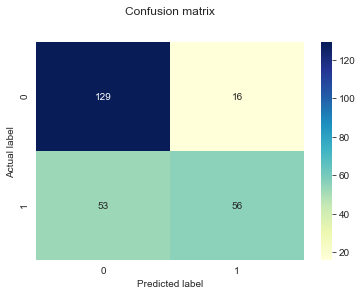

In [36]:
y_pred = knn.predict(enc_X_test)


cnf_matrix = metrics.confusion_matrix(enc_target_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##### Fine Tuning

In [37]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,25)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,target)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7189956385078335
Best Parameters: {'n_neighbors': 15}


##### ROC AUC

In [38]:
#Initialite Fine-tuned Model

knn = KNeighborsClassifier(15)
model = knn.fit(X,target)

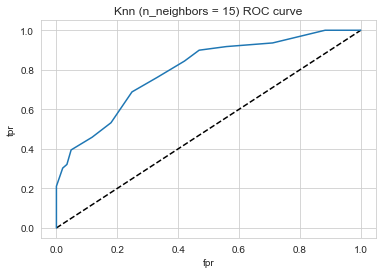

 Area Under the ROC curve : 0.7969629863967099


In [39]:
##Plot the curve

y_pred_proba = model.predict_proba(enc_X_test)[:,1]
fpr, tpr, thresholds = roc_curve(enc_target_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn (n_neighbors = 15) ROC curve')
plt.show()

#Area under ROC curve

print(" Area Under the ROC curve :",roc_auc_score(enc_target_test,y_pred_proba))


##### Evaluation of Model Performance on CV

In [40]:
scores = cross_val_score(knn, enc_X_test, enc_target_test, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.71 accuracy with a standard deviation of 0.08


#### Conclusions and Recomendations
____

In conclussion, according to the predictive models (Regression & KNN) and stadistics as correlation coefficient, through the variables we are managing, only 20% of the phenomena its explainable, being the best predictor the constant itself. Best predictors are:

- age 0.316967
- high blood pressure 0.286930
- previous diabetes education 0.202280
- gender 0.195423
- heart disease 0.103372

The variables that has the worst eficacy explaining the phenomena are those related with race, education or economy.

- medical home category                          0.069168
- problem area in diabetes (paid) scale score    0.039608
- education level                                0.026994
- race/ethnicity                                 0.025725
- carbohydrate counting                          0.007162
- class                                          0.002733

KNN Model accuracy is 0,71 (stdv 0,08) and Regression R2 is 0,20. Meaning yhat maybe the variables studied are not the most appropiatte ones to study diabetes itself, but any other phenomena that is not whithin the scope of this study.

Finally, we propose for further studies an unbalanced data collection to meassure social variables whitout biasing risk.

#### References
____

##### Cientifical Resources
- Tanner, T., Predicting and preventing student failure — using the k-nearest neighbour, date retrieved: 03/14/2021, https://core.ac.uk/download/pdf/14920734.pdf
- Qingbo Li, An improved k-nearest neighbour method to diagnose breast cancer, date retrieved: 03/14/2021, https://pubs.rsc.org/en/content/articlelanding/2018/an/c8an00189h#!divAbstract
- Pascal, V., K-Local Hyperplane and Convex Distance Nearest Neighbor Algorithms, date retrieved: 03/14/2021, https://www.researchgate.net/publication/2539168_K-Local_Hyperplane_and_Convex_Distance_Nearest_Neighbor_Algorithms
-Chiagozie Nwasuruba, Christie Osuagwu, Sejong Bae, Karan P. Singh, Leonard E. Egede, Racial differences in diabetes self-management and quality of care in Texas, Journal of Diabetes and its Complications, Volume 23, Issue 2, 2009, Pages 112-118, ISSN 1056-8727                
https://doi.org/10.1016/j.jdiacomp.2007.11.005.

##### Other Sources
- https://www.kaggle.com/code
-https://www.cdc.gov/diabetes/
- https://scikit-learn.org/stable/index.html
- https://learn.datacamp.com/